In [34]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (15, 8)

In [35]:
ldf_regular = pd.read_csv('./LDF_REGULAR.csv', sep=';')
ldf_optimised = pd.read_csv('./LDF_OPTIMIZED.csv', sep=';')
sparqlmm_2 = pd.read_csv('./SPARQLMM.csv', sep=',')

In [36]:
ldf_regular['mean total CPU'] = ldf_regular['mean cpu usage ldf'] + ldf_regular['mean cpu usage nginx']
ldf_optimised['mean total CPU'] = ldf_optimised['mean cpu usage ldf'] + ldf_optimised['mean cpu usage nginx']
ldf_regular['bandwidth per client'] = ldf_regular['mean bandwidth total'] / ldf_regular['number of clients']
ldf_optimised['bandwidth per client'] = ldf_optimised['mean bandwidth total'] / ldf_optimised['number of clients']
print (ldf_regular['bandwidth per client'])
sparqlmm_2['mean total CPU'] = sparqlmm_2['mean cpu usage ldf'] + sparqlmm_2['mean cpu usage nginx']
sparqlmm_2.fillna(method="ffill")

0     11.401000
1      5.087530
2      2.275773
3     10.767650
4     11.559400
5     14.236767
6      8.391200
7      9.919150
8     12.165978
9      5.473340
10    11.094800
11     8.601583
12     7.600031
13     9.436243
14     5.799373
15     8.226500
16     8.058482
17    10.283144
18    11.286842
19     4.488530
20     8.916743
21     5.983845
22    10.799478
23     7.745858
24     7.296304
25     8.764846
26     7.849926
27    10.573429
28    10.759862
29     9.427133
30    10.309548
31     8.454875
32    11.063333
33     9.374706
34     9.805486
35     8.411333
36     9.758595
37     9.516053
38     8.935436
39     8.034050
Name: bandwidth per client, dtype: float64


,number of clients,mean number of rejected,min number of rejected,max number of rejected,mean execution time,min execution time,max execution time,mean cpu usage ldf,min cpu usage ldf,max cpu usage ldf,...,mean bandwidth ldf,min bandwidth ldf,max bandwidth ldf,mean bandwidth total,min bandwidth total,max bandwidth total,mean number of requests,min number of requests,max number of requests,mean total CPU
0,5,0,0,2.847883,2.847883,2.847883,42.93125,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.585749,0.585749,0.585749,5,5,5,0.00000
1,10,5,5,0.771262,0.771262,0.771262,81.23750,81.16250,81.16250,81.16250,...,0.034037,0.034037,0.034037,0.266368,0.266368,0.266368,10,10,10,81.21875
2,15,14,14,50.142937,50.142937,50.142937,81.25625,81.24375,81.24375,81.24375,...,0.102110,0.102110,0.102110,0.102110,0.102110,0.102110,15,15,15,81.30000
3,20,16,16,39.722566,39.722566,39.722566,81.23125,79.96250,79.96250,79.96250,...,0.131359,0.131359,0.131359,0.131897,0.131897,0.131897,20,20,20,80.01875
4,25,25,25,39.722566,39.722566,39.722566,81.15000,81.19375,81.19375,81.19375,...,0.000000,0.000000,0.000000,0.210179,0.210179,0.210179,3,3,3,81.25000
5,30,30,30,39.722566,39.722566,39.722566,81.44375,81.19375,81.19375,81.19375,...,0.000000,0.000000,0.000000,0.519543,0.519543,0.519543,1,1,1,81.25000
6,35,27,27,201.787461,201.787461,201.787461,81.20000,80.75000,80.75000,80.75000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,15,15,80.80625
7,40,40,40,201.787461,201.787461,201.787461,77.54375,81.15625,81.15625,81.15625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,81.21250
8,45,42,42,74.227471,74.227471,74.227471,79.12500,80.74375,80.74375,80.74375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,80.80000
9,50,43,43,479.501117,479.501117,479.501117,79.06875,81.09375,81.09375,81.09375,...,0.005033,0.005033,0.005033,0.005033,0.005033,0.005033,29,29,29,81.15000


y = 0.296327x + 16.650827
y = 0.696155x + 210.287457


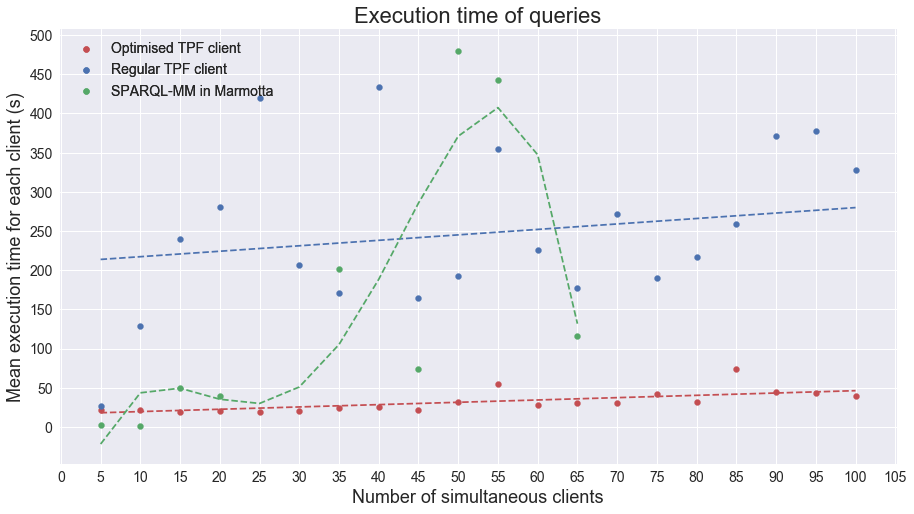

In [44]:
# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients', y='mean execution time', title="Execution time of queries", figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("Execution time of queries", fontdict=None, fontsize=22)

ldf_regular.iloc[0:20].plot(x = 'number of clients', y = 'mean execution time', ax = ax, kind='scatter', color='b', s=36)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sparqlmm_2.iloc[0:20].plot(x = 'number of clients', y = 'mean execution time', ax = ax, kind='scatter', color='g', s=36)
legend1 = plt.legend(["Optimised TPF client","Regular TPF client", "SPARQL-MM in Marmotta" ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean execution time'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:20]['number of clients'])
ax.plot(ldf_optimised.iloc[0:20]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean execution time'], 1)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:20]['number of clients'])
ax.plot(ldf_regular.iloc[0:20]['number of clients'], trendline, '--', color='b')

idx = np.isfinite(sparqlmm_2['number of clients']) & np.isfinite(sparqlmm_2['mean execution time'])
z_sparql = np.polyfit(sparqlmm_2['number of clients'][idx], sparqlmm_2['mean execution time'][idx], 4)
f_sparql = np.poly1d(z_sparql)

trendline = f_sparql(sparqlmm_2.iloc[0:13]['number of clients'])
ax.plot(sparqlmm_2.iloc[0:13]['number of clients'], trendline, '--', color='g')

ax.locator_params(axis='x', nbins=25)
ax.locator_params(axis='y', nbins=20)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Mean execution time for each client (s)", fontdict=None, labelpad=None, fontsize=18)

ax.add_artist(legend1)
#ax.add_artist(legend2)
plt.savefig('execution_time.pdf', bbox_inches='tight')

y = 11.435843x + 16.355213
y = 9.299619x + -28.593123
y = -0.003701x + 0.290791


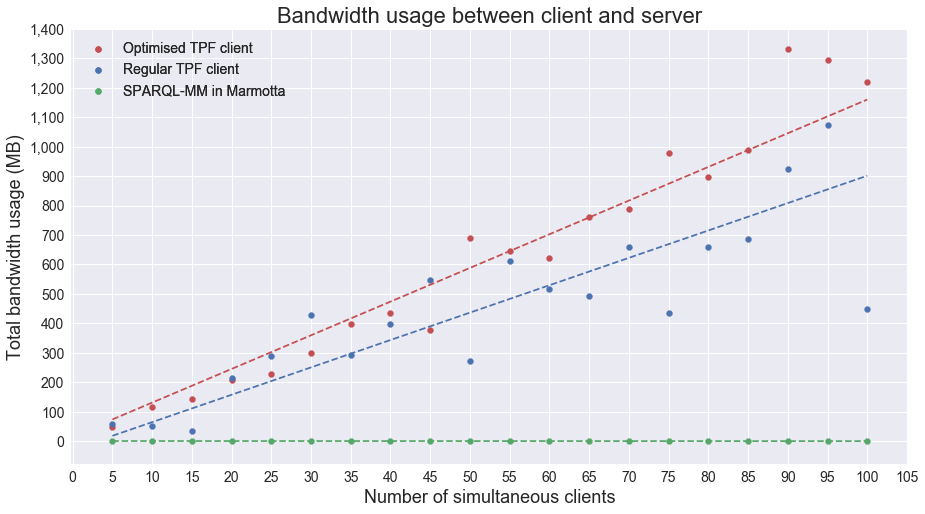

In [38]:
# Plot the mean bandwidth usage of LDF_regular vs LDF_optimised
#ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients', y='mean bandwidth total', title="Bandwidth usage between client and server", figsize=(15, 8))
#ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None)
#ax.set_ylabel("Total bandwidth usage (MB)", fontdict=None, labelpad=None)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ldf_regular.iloc[0:20].plot(x = 'number of clients', y='mean bandwidth total', ax=ax)
#sparqlmm.iloc[0:20].plot(x = 'number of clients', y='mean bandwidth total', ax=ax)
#ax.legend(["Optimised TPF client", "Regular TPF client","SPARQL-MM in Marmotta" ])

# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients',  y='mean bandwidth total', title="Bandwidth usage between client and server", figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("Bandwidth usage between client and server", fontdict=None, fontsize=22)
ldf_regular.iloc[0:20].plot(x = 'number of clients', y = 'mean bandwidth total', ax = ax, kind='scatter', color='b', s=36)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sparqlmm_2.iloc[0:20].plot(x = 'number of clients', y = 'mean bandwidth total', ax = ax, kind='scatter', color='g', s=36)
legend1 = plt.legend(["Optimised TPF client","Regular TPF client", "SPARQL-MM in Marmotta" ], prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean bandwidth total'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:20]['number of clients'])
ax.plot(ldf_optimised.iloc[0:20]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean bandwidth total'], 1)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:20]['number of clients'])
ax.plot(ldf_regular.iloc[0:20]['number of clients'], trendline, '--', color='b')

z_sparql = np.polyfit(sparqlmm_2['number of clients'], sparqlmm_2['mean bandwidth total'], 1)
f_sparql = np.poly1d(z_sparql)
print("y = %.6fx + %.6f"%(z_sparql[0],z_sparql[1]))
trendline = f_sparql(sparqlmm_2.iloc[0:20]['number of clients'])
ax.plot(sparqlmm_2.iloc[0:20]['number of clients'], trendline, '--', color='g')

ax.locator_params(axis='x', nbins=25)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total bandwidth usage (MB)", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('bandwidth.pdf', bbox_inches='tight')
#ax.add_artist(legend2)

y = 14986.368893x + 21368.788462
y = 12094.594765x + -37463.388462
y = 0.000001x + -0.000166


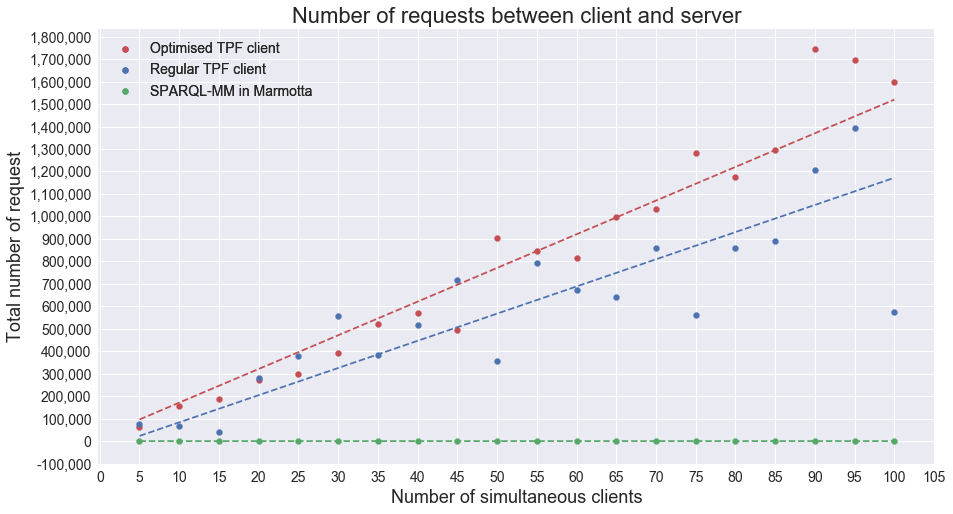

In [39]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
#ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients', y='mean number of requests', title="Number of requests between client and server", figsize=(15, 8))
#ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None)
#ax.set_ylabel("Total number of request", fontdict=None, labelpad=None)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ldf_regular.iloc[0:20].plot(x = 'number of clients', y='mean number of requests', ax=ax)
#ax.legend(["Optimised TPF client", "Regular TPF client","SPARQL-MM in Marmotta" ])

# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients',  y='mean number of requests', title="Number of requests between client and server", figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("Number of requests between client and server", fontdict=None, fontsize=22)
ldf_regular.iloc[0:20].plot(x = 'number of clients', y = 'mean number of requests', ax = ax, kind='scatter', color='b', s=36)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sparqlmm_2.iloc[0:20].plot(x = 'number of clients', y = 'mean number of requests', ax = ax, kind='scatter', color='g', s=36)
legend1 = plt.legend(["Optimised TPF client","Regular TPF client", "SPARQL-MM in Marmotta" ], prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean number of requests'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:20]['number of clients'])
ax.plot(ldf_optimised.iloc[0:20]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean number of requests'], 1)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:20]['number of clients'])
ax.plot(ldf_regular.iloc[0:20]['number of clients'], trendline, '--', color='b')

z_sparql = np.polyfit(sparqlmm_2['number of clients'], sparqlmm_2['mean number of requests'], 5)
f_sparql = np.poly1d(z_sparql)
print("y = %.6fx + %.6f"%(z_sparql[0],z_sparql[1]))
trendline = f_sparql(sparqlmm_2.iloc[0:20]['number of clients'])
ax.plot(sparqlmm_2.iloc[0:20]['number of clients'], trendline, '--', color='g')

ax.locator_params(axis='x', nbins=25)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total number of request", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('requests.pdf', bbox_inches='tight')
#ax.add_artist(legend2)

y = 0.011562x + 3.108085
y = 0.111390x + 16.416779
y = -0.000430x + 80.951930


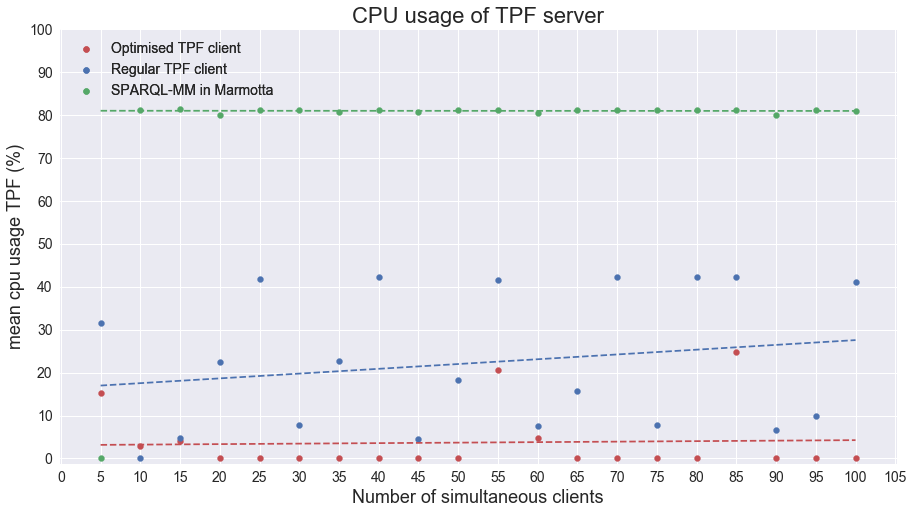

In [40]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
#ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients', y='mean cpu usage ldf', title="CPU usage of LDF server", figsize=(15, 8))
#ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None)
#ax.set_ylabel("CPU usage (%)", fontdict=None, labelpad=None)
#ldf_regular.iloc[0:20].plot(x = 'number of clients', y='mean cpu usage ldf', ax=ax)
#ax.legend(["TPF client with rewrite", "Regular TPF client", ])
#ax.legend(["Optimised TPF client", "Regular TPF client","SPARQL-MM in Marmotta" ])

# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients',  y='mean cpu usage ldf', title="CPU usage of TPF/Marmotta server", figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("CPU usage of TPF server", fontdict=None, fontsize=22)
ax.set_ylim(ymax=100)
ldf_regular.iloc[0:20].plot(x = 'number of clients', y = 'mean cpu usage ldf', ax = ax, kind='scatter', color='b', s=36)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sparqlmm_2.iloc[0:20].plot(x = 'number of clients', y = 'mean cpu usage ldf', ax = ax, kind='scatter', color='g', s=36)
legend1 = plt.legend(["Optimised TPF client","Regular TPF client", "SPARQL-MM in Marmotta" ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean cpu usage ldf'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:20]['number of clients'])
ax.plot(ldf_optimised.iloc[0:20]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean cpu usage ldf'], 1)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:20]['number of clients'])
ax.plot(ldf_regular.iloc[0:20]['number of clients'], trendline, '--', color='b')

z_sparql = np.polyfit(sparqlmm_2.iloc[1:20]['number of clients'], sparqlmm_2.iloc[1:20]['mean cpu usage ldf'], 1)
f_sparql = np.poly1d(z_sparql)
print("y = %.6fx + %.6f"%(z_sparql[0],z_sparql[1]))
trendline = f_sparql(sparqlmm_2.iloc[0:20]['number of clients'])
ax.plot(sparqlmm_2.iloc[0:20]['number of clients'], trendline, '--', color='g')

ax.locator_params(axis='x', nbins=25)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean cpu usage TPF (%)", fontdict=None, labelpad=None, fontsize=18)

#ax.add_artist(legend2)
plt.savefig('cpu_ldf.pdf', bbox_inches='tight')

y = 0.000000x + -0.000001
y = -0.000000x + -0.000000
y = 0.000000x + -0.000000


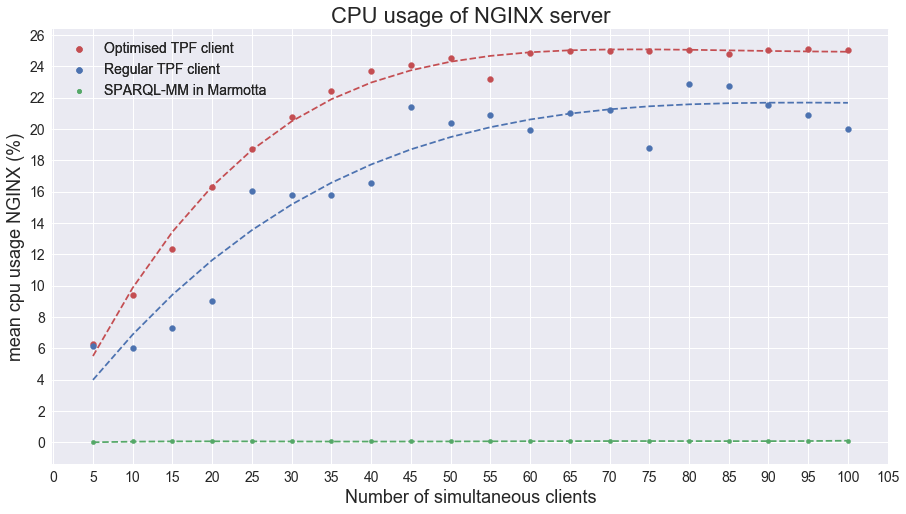

In [41]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
#ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients', y='mean cpu usage nginx', title="CPU usage of NGINX server", figsize=(15, 8))
#ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None)
#ax.set_ylabel("CPU usage (%)", fontdict=None, labelpad=None)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ldf_regular.iloc[0:20].plot(x = 'number of clients', y='mean cpu usage nginx', ax=ax)
#ax.legend(["Optimised TPF client", "Regular TPF client","SPARQL-MM in Marmotta" ])

# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients',  y='mean cpu usage nginx', title="CPU usage of NGINX server", figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("CPU usage of NGINX server", fontdict=None, fontsize=22)
ldf_regular.iloc[0:20].plot(x = 'number of clients', y = 'mean cpu usage nginx', ax = ax, kind='scatter', color='b', s=36)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sparqlmm_2.iloc[0:20].plot(x = 'number of clients', y = 'mean cpu usage nginx', ax = ax, kind='scatter', color='g')
legend1 = plt.legend(["Optimised TPF client","Regular TPF client", "SPARQL-MM in Marmotta" ], prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean cpu usage nginx'], 5)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:20]['number of clients'])
ax.plot(ldf_optimised.iloc[0:20]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean cpu usage nginx'], 5)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:20]['number of clients'])
ax.plot(ldf_regular.iloc[0:20]['number of clients'], trendline, '--', color='b')

z_sparql = np.polyfit(sparqlmm_2['number of clients'], sparqlmm_2['mean cpu usage nginx'], 5)
f_sparql = np.poly1d(z_sparql)
print("y = %.6fx + %.6f"%(z_sparql[0],z_sparql[1]))
trendline = f_sparql(sparqlmm.iloc[0:20]['number of clients'])
ax.plot(sparqlmm_2.iloc[0:20]['number of clients'], trendline, '--', color='g')

ax.locator_params(axis='x', nbins=25)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean cpu usage NGINX (%)", fontdict=None, labelpad=None, fontsize=18)

#ax.add_artist(legend2)
plt.savefig('cpu_nginx.pdf', bbox_inches='tight')

y = -0.000666x + 0.195930
y = -0.000384x + 0.247464
y = 0.000015x + 80.995208


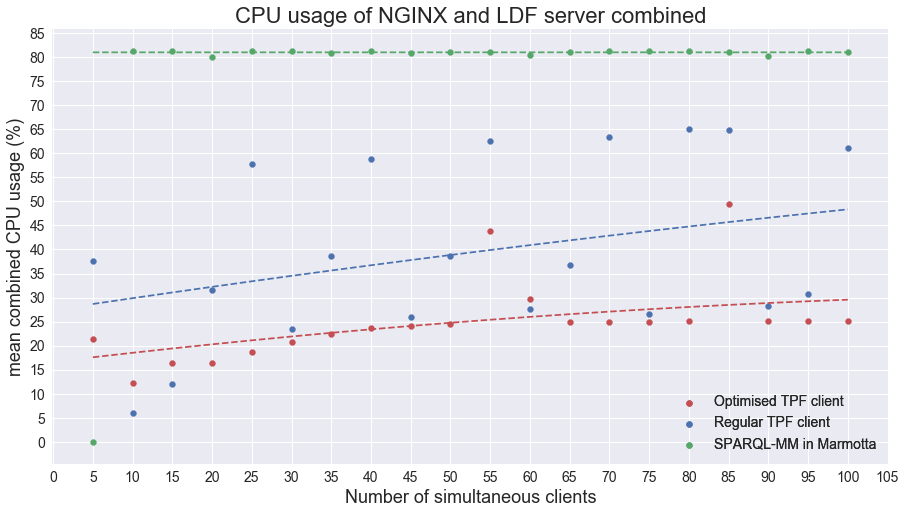

In [42]:
# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients',  y='mean total CPU', title="CPU usage of NGINX and TPF/Marmotta server combined", figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("CPU usage of NGINX and LDF server combined", fontdict=None, fontsize=22)
ldf_regular.iloc[0:20].plot(x = 'number of clients', y = 'mean total CPU', ax = ax, kind='scatter', color='b', s=36)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sparqlmm_2.iloc[0:20].plot(x = 'number of clients', y = 'mean total CPU', ax = ax, kind='scatter', color='g', s=36)
legend1 = plt.legend(["Optimised TPF client","Regular TPF client", "SPARQL-MM in Marmotta" ], prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean total CPU'], 2)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:20]['number of clients'])
ax.plot(ldf_optimised.iloc[0:20]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean total CPU'], 2)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:20]['number of clients'])
ax.plot(ldf_regular.iloc[0:20]['number of clients'], trendline, '--', color='b')

z_sparql = np.polyfit(sparqlmm_2.iloc[1:20]['number of clients'], sparqlmm_2.iloc[1:20]['mean total CPU'], 1)
f_sparql = np.poly1d(z_sparql)
print("y = %.6fx + %.6f"%(z_sparql[0],z_sparql[1]))
trendline = f_sparql(sparqlmm_2.iloc[0:20]['number of clients'])
ax.plot(sparqlmm_2.iloc[0:20]['number of clients'], trendline, '--', color='g')

ax.locator_params(axis='x', nbins=25)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean combined CPU usage (%)", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('cpu_total.pdf', bbox_inches='tight')
#ax.add_artist(legend2)

y = 0.000000x + 0.000000
y = 0.000000x + 0.000000
y = 1.046617x + -4.347368


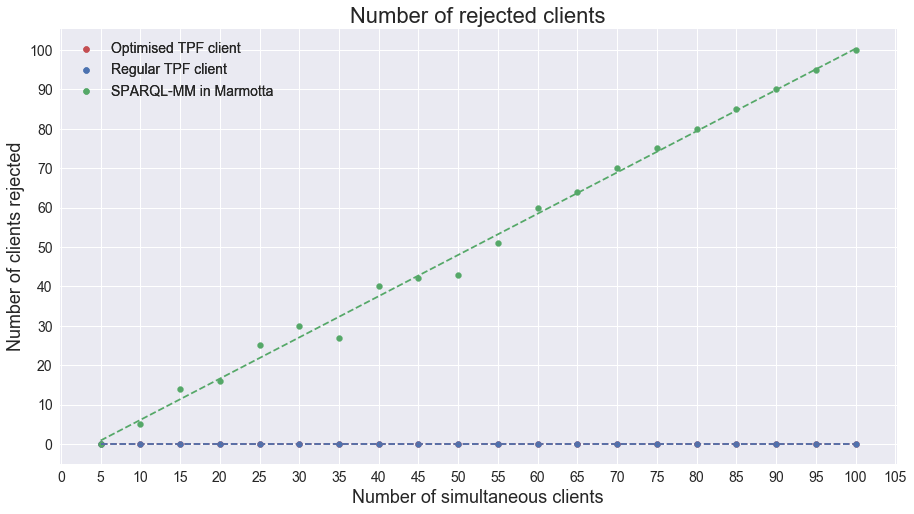

In [43]:
# Plot the rejections (LDF + NGINX)
ax = ldf_optimised.iloc[0:20].plot(x = 'number of clients', y='mean number of rejected', title="Number of rejected clients", figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("Number of rejected clients", fontdict=None, fontsize=22)
ldf_regular.iloc[0:20].plot(x = 'number of clients', y='mean number of rejected', ax=ax, kind='scatter', color='b', s=36)
sparqlmm_2.iloc[0:20].plot(x = 'number of clients', y='mean number of rejected', ax=ax, kind='scatter', color='g', s=36)
legend1 = plt.legend(["Optimised TPF client", "Regular TPF client","SPARQL-MM in Marmotta" ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean number of rejected'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:20]['number of clients'])
ax.plot(ldf_optimised.iloc[0:20]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean number of rejected'], 1)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:20]['number of clients'])
ax.plot(ldf_regular.iloc[0:20]['number of clients'], trendline, '--', color='b')

z_sparql = np.polyfit(sparqlmm_2['number of clients'], sparqlmm_2['mean number of rejected'], 1)
f_sparql = np.poly1d(z_sparql)
print("y = %.6fx + %.6f"%(z_sparql[0],z_sparql[1]))
trendline = f_sparql(sparqlmm_2.iloc[0:20]['number of clients'])
ax.plot(sparqlmm_2.iloc[0:20]['number of clients'], trendline, '--', color='g')

ax.locator_params(axis='x', nbins=25)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Number of clients rejected", fontdict=None, labelpad=None, fontsize=18)

#ax.add_artist(legend2)
plt.savefig('rejected.pdf', bbox_inches='tight')